In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
# https://fredriccliver.medium.com/cant-not-see-axis-label-of-jupyter-notebook-in-the-dark-theme-vscode-df31a3ee121
# print(plt.style.available)
# style.use('dark_background')
# style.use('seaborn-darkgrid')
style.use('ggplot')
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
import ast
import json
import numpy as np

def convert_presto_kv_to_json(x, top_k=50):
    return {k: v for k, v in sorted(
        ast.literal_eval(x.replace('=', ':')).items()) if k < top_k}

def str_to_json(x):
    return json.loads(x)

def ranking_ratio(x):
    sum_val = sum(x.values())
    return [round(v/sum_val,2) for k, v in x.items()]

def get_click_dist(x):
    if not x:
        return []
    max_val = max(x.keys())
    dist = []
    for i in range(max_val):
        dist.append(x.get(i, 0))
    return dist

def mapping_object_id_to_rank(row):
    id2rank = {}
    for rank, id in zip(row['object_idx_list'], row['object_id_list']):
        if rank >= 50:
            continue
        cc = row['click_ranking'][rank]
        id2rank[id] = (rank, cc)
    return id2rank
        
# df = pd.read_csv('./card.ranking.query-click.qc10.rs10K.20220301.20220307.csv')
df = pd.read_csv('./card.tab.ranking.query-click.qc10.rs10K.20220301.20220307.csv')
df['click_ranking'] = df['click_ranking'].apply(convert_presto_kv_to_json)
df['click_dist'] = df['click_ranking'].apply(get_click_dist)
df['ranking_ratio'] = df['click_ranking'].apply(ranking_ratio)
df['object_idx_list'] = df['object_idx_list'].apply(str_to_json)
df['object_id_list'] = df['object_id_list'].apply(str_to_json)
df['id2rank'] = df.apply(lambda row: mapping_object_id_to_rank(row), axis=1)
df['ctr'] = df['ctr'].apply(lambda x: round(x, 2))
# print(df.info())
df.head()

,search_keyword,qc,cc,ctr,avg_object_idx,click_ranking,object_idx_list,object_id_list,click_dist,ranking_ratio,id2rank
0,화장대세트,16.0,7.0,43.75,68.35,"{2: 1, 3: 1, 4: 1, 10: 1, 14: 1, 19: 1, 20: 1,...","[3, 19, 4, 119, 78, 10, 39, 92, 46, 67, 2, 47,...","[10150987, 10603870, 10150988, 3134312, 699565...","[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.0...","{10150987: (3, 1), 10603870: (19, 1), 10150988..."
1,슬라이딩리빙박스,12.0,5.0,41.67,16.57,"{0: 2, 2: 1, 3: 1, 5: 1, 6: 1, 7: 3, 17: 1, 33...","[6, 7, 0, 7, 2, 34, 0, 55, 56, 33, 5, 3, 7, 17]","[14671529, 10286211, 4214849, 8480441, 7412417...","[2, 0, 1, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, ...","[0.17, 0.08, 0.08, 0.08, 0.08, 0.25, 0.08, 0.0...","{14671529: (6, 1), 10286211: (7, 3), 4214849: ..."
2,쓰레기,10.0,3.0,30.00,10.00,"{2: 2, 3: 2, 15: 1, 16: 1, 18: 1, 21: 1}","[15, 21, 16, 3, 2, 3, 18, 2]","[6512826, 1473400, 8426561, 11301146, 5268127,...","[0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.25, 0.25, 0.12, 0.12, 0.12, 0.12]","{6512826: (15, 1), 1473400: (21, 1), 8426561: ..."
3,템바보드타일,28.0,17.0,60.71,33.60,"{0: 6, 1: 1, 2: 1, 4: 7, 5: 4, 6: 1, 7: 2, 10:...","[20, 70, 24, 4, 47, 49, 5, 47, 11, 4, 16, 43, ...","[9196627, 5851390, 9800991, 12322257, 12806643...","[6, 1, 1, 0, 7, 4, 1, 2, 0, 0, 3, 1, 2, 0, 1, ...","[0.14, 0.02, 0.02, 0.16, 0.09, 0.02, 0.05, 0.0...","{9196627: (20, 2), 9800991: (24, 1), 12322257:..."
4,보온병,19.0,8.0,42.11,36.62,"{2: 1, 3: 1, 5: 1, 9: 2, 10: 1, 18: 1, 24: 1, ...","[24, 9, 30, 35, 18, 2, 211, 5, 62, 10, 3, 58, 9]","[9443122, 2553240, 6024291, 2382594, 6690828, ...","[0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, ...","[0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1]","{9443122: (24, 1), 2553240: (9, 2), 6024291: (..."


## 클릭 랭킹 분포 그래프

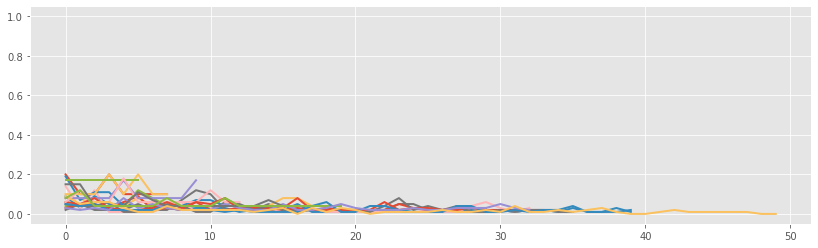

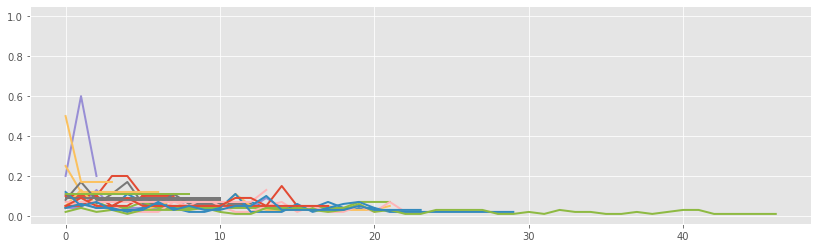

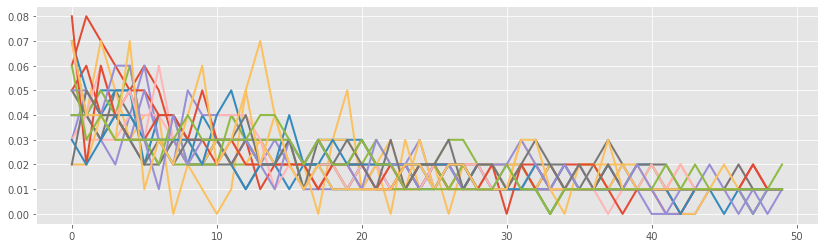

In [2]:
# plot size
# plt.figure(figsize=(12, 3))

sample_size = 20

for idx, row in df.sample(sample_size).iterrows():
    # click_dist = row['click_dist']
    click_dist = row['ranking_ratio']
    if not click_dist:
        continue
    x = list(range(len(click_dist)))
    plt.plot(x, click_dist)
plt.show()

for idx, row in df.loc[df['qc'] < 50].sample(sample_size).iterrows():
    # click_dist = row['click_dist']
    click_dist = row['ranking_ratio']
    if not click_dist:
        continue
    x = list(range(len(click_dist)))
    plt.plot(x, click_dist)
plt.show()

# NOTE: QC가 높을수록 분포가 넓다. 즉 관련된 사진이 많아서인지 스크롤링도 많고 클릭도 멀리 분포
for idx, row in df.loc[df['qc'] > 500].sample(sample_size).iterrows():
    # click_dist = row['click_dist']
    click_dist = row['ranking_ratio']
    if not click_dist:
        continue
    x = list(range(len(click_dist)))
    plt.plot(x, click_dist)
plt.show()

# variance가 큰 질의들
# 우상향하는 질의들


## 못하는 질의 추출
* 클릭랭킹이 4등 이상인 경우(단, 통합검색의 경우에는 9개 정도까지는 사용자 경험 측면에서 크게 문제가 없어보인다?)
* 클릭이 거의 발생하지 않은 경우
* 클릭이 집중적으로 발생한 곳의 랭킹이 낮은 경우

In [8]:
from scipy.stats import skew

def get_first_click(row, first_click=3):
    """ index starts at 0 """
    if not row['click_ranking']:
        return True
    return True if list(row['click_ranking'].keys())[0] >= first_click else False

def sparse_click(row, ratio=0.3):
    if not row['click_ranking']:
        return True
    max_val = max(row['click_ranking'].keys()) + 1
    sparse_ratio = len(row['click_ranking'].keys()) / max_val
    return True if sparse_ratio <= ratio else False

def low_click_on_top(row, top_k=20, ratio=0.3):
    """ 상위 k개 결과내에 ratio 이상의 클릭이 모이지 않은 경우 """
    if not row['click_ranking']:
        return True
    return True if sum(row['ranking_ratio'][:top_k]) <= 0.3 else False

def low_ctr(row, cutoff=0.2):
    if row['qc'] <= 0:
        return False  # 제외
    return True if row['cc'] / row['qc'] < cutoff else False

def calculate_skew(row):
    if not row['click_ranking']:
        return 0.0
    data = []
    for i in range(max(row['click_ranking'].keys())):
        data.append(row['click_ranking'].get(i, 0))
    return round(skew(data), 2)

def _select_bad_cases(df, ratio=0.66):
    # 주로 높은 QC의 쿼리들은 클릭이 다양하게 분포해있다.
    # low ctr은 대부분의 쿼리에 해당하므로 크게 영향이 없어보인다.
    # cols = ['>=nth click', 'sparse', 'low_ctr']
    cols = ['>=nth click', 'sparse', 'low_click_on_top']
    idx_list = []
    for idx, row in df.iterrows():
        if sum([row[x] for x in cols]) / len(cols) > ratio:
            idx_list.append(idx)
    return df.iloc[idx_list]

# queries = df[idx_list]['search_keyword'].unique().tolist()
# df[idx_list]
df['>=nth click'] = df.apply(lambda row: get_first_click(row, 3), axis=1)
df['sparse'] = df.apply(lambda row: sparse_click(row, 0.3), axis=1)
df['low_ctr'] = df.apply(lambda row: low_ctr(row, 0.2), axis=1)
df['skew'] = df.apply(lambda row: calculate_skew(row), axis=1)
df['low_click_on_top'] = df.apply(lambda row: low_click_on_top(row), axis=1)
# change setting
# pd.set_option('display.max_colwidth', None)
# pd.reset_option('all')

_select_bad_cases(df).loc[df['qc'] > 50]
# _select_bad_cases(df).loc[(df['qc'] > 50) & (df['skew'] < 0)]
#_select_bad_cases(df).loc[(df['qc'] > 100) & (df['skew'] > 0)]
# df.sort_values(by=['qc'], ascending=False)
# df[df['qc'] < 500]

/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1051: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,search_keyword,qc,cc,ctr,avg_object_idx,click_ranking,object_idx_list,object_id_list,click_dist,ranking_ratio,id2rank,>=nth click,sparse,low_ctr,skew,low_click_on_top
737,휴지,56.0,4.0,7.14,14.00,"{3: 1, 10: 1, 17: 1, 26: 1}","[10, 26, 17, 3]","[10711496, 3815454, 15224852, 14616978]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0.25, 0.25, 0.25, 0.25]","{10711496: (10, 1), 3815454: (26, 1), 15224852...",True,True,True,2.41,False
1288,쇼파방석,69.0,13.0,18.84,50.30,"{3: 1, 9: 1, 10: 1, 18: 1, 26: 2, 35: 2, 37: 1...","[65, 52, 35, 69, 3, 42, 35, 69, 40, 26, 164, 7...","[9490629, 4626654, 14295861, 12498756, 1331587...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[0.09, 0.09, 0.09, 0.09, 0.18, 0.18, 0.09, 0.0...","{14295861: (35, 2), 13315879: (3, 1), 9516136:...",True,True,True,2.15,False
3096,z플립3,56.0,1.0,1.79,36.00,{36: 2},"[36, 36]","[14972527, 14972527]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1.0],"{14972527: (36, 2)}",True,True,True,0.00,False
5118,패드,58.0,3.0,5.17,8.67,"{3: 1, 8: 1, 15: 1}","[15, 8, 3]","[14184498, 13352794, 10782782]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[0.33, 0.33, 0.33]","{14184498: (15, 1), 13352794: (8, 1), 10782782...",True,True,True,2.16,False
5715,모도리,61.0,6.0,9.84,44.09,"{5: 1, 7: 1, 12: 1, 18: 2, 31: 1, 45: 1}","[68, 68, 12, 45, 5, 7, 18, 31, 18, 149, 64]","[12672678, 12672678, 12443600, 10393541, 12302...","[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...","[0.14, 0.14, 0.14, 0.29, 0.14, 0.14]","{12443600: (12, 1), 10393541: (45, 1), 1230275...",True,True,True,3.13,False
6163,테이블세트,84.0,3.0,3.57,60.38,"{10: 1, 11: 1, 20: 1}","[11, 56, 53, 75, 71, 187, 10, 20]","[13369152, 6635590, 9154160, 8726855, 12486557...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0.33, 0.33, 0.33]","{13369152: (11, 1), 11777983: (10, 1), 1404162...",True,True,True,2.67,False


## 쿼리별로 저품질 문서 가능성이 높은 것을 만들어주기
* (쿼리, 저품질 문서ID 리스트, QC, CC, click_ranking)

In [14]:
import random
writer = open('./query.debug.jsonl', 'w+')

sample_df = df.loc[df['>=nth click'] == True]
sample_df = df.loc[(df['>=nth click'] == True) & (df['qc'] >= 20)]
print(len(sample_df))
cnt = 0
for idx, row in sample_df.sample(min(1000, len(sample_df))).iterrows():
    # if cnt == 100:
    #     break
    data = {
        "query": row['search_keyword'],
        "qc": int(row["qc"]),
        "cc": int(row["cc"]),
        # "low_quality_ids": random.choices(row["object_id_list"], k=3),
        "id2rank": row['id2rank'],
        "click_dist": row["click_dist"],
        # "object_id_list": row["object_id_list"]
    }
    writer.write(json.dumps(data, ensure_ascii=False) + '\n')
    cnt += 1

writer.close()

162


## 데이터 분석
* 각 필드별 na 비율


In [2]:
# The info method prints to the screen the number of non-missing values of each column,
# along with the data types of each column and some other meta-data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             9336 non-null   float64
 1   visitor_id          10000 non-null  object 
 2   session_id          10000 non-null  object 
 3   uuid                9258 non-null   object 
 4   adid                6003 non-null   object 
 5   platform            10000 non-null  object 
 6   platform_version    9258 non-null   object 
 7   category            10000 non-null  object 
 8   url_full            10000 non-null  object 
 9   url_path            10000 non-null  object 
 10  url_params          10000 non-null  object 
 11  url_model_type      0 non-null      float64
 12  url_model_id        0 non-null      float64
 13  access_time         10000 non-null  object 
 14  server_access_time  10000 non-null  object 
 15  object_id           10000 non-null  int64  
 16  objec

In [18]:
# missing value ratio
# df.isna().sum() / len(df) * 100
df.isna().mean() * 100

id                    0.00
description          42.06
place                 0.00
keyword_list         63.97
image_url             0.00
view_count            0.00
scrap_count           0.00
reply_count           0.00
praise_count          0.00
share_count           0.00
user_id               0.00
nickname              0.00
follower_count       42.00
user_card_count       0.00
company              89.90
userable_type         0.00
profile_image_url     0.00
area                 40.13
style                58.92
card_style           61.76
project_style        97.16
residence            39.26
card_residence       58.27
project_residence    80.99
best_value            0.00
rank_value            0.00
is_project            0.00
created_at            0.00
color                 0.00
type                  0.00
video_duration       99.56
prod_name             0.00
prod_brand_name       0.00
prod_categories       0.00
dtype: float64

In [3]:
df.describe()

,user_id,url_model_type,url_model_id,object_id,object_idx,object_url,category_id,brand_name,deal_product_id
count,9.336000e+03,0.0,0.0,1.000000e+04,10000.000000,0.0,0.0,0.0,0.0
mean,8.566238e+06,NaN,NaN,1.023645e+07,67.508800,NaN,NaN,NaN,NaN
std,5.390119e+06,NaN,NaN,3.878421e+06,129.484448,NaN,NaN,NaN,NaN
min,7.194000e+03,NaN,NaN,2.380000e+02,0.000000,NaN,NaN,NaN,NaN
25%,3.867889e+06,NaN,NaN,8.472441e+06,5.000000,NaN,NaN,NaN,NaN
50%,7.686502e+06,NaN,NaN,1.124730e+07,22.000000,NaN,NaN,NaN,NaN
75%,1.332851e+07,NaN,NaN,1.323947e+07,75.000000,NaN,NaN,NaN,NaN
max,1.724754e+07,NaN,NaN,1.528836e+07,2249.000000,NaN,NaN,NaN,NaN


키워드, object_id(페이지연결), object_idx 분포

         object_idx
count  10000.000000
mean      67.508800
std      129.484448
min        0.000000
25%        5.000000
50%       22.000000
75%       75.000000
max     2249.000000


array([[<AxesSubplot:title={'center':'object_idx'}>]], dtype=object)

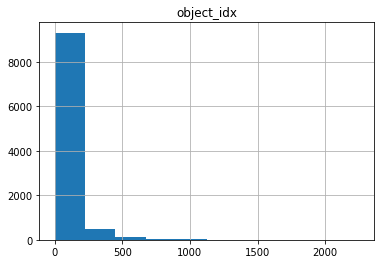

In [26]:
def add_url_path(row):
    return f'https://ohou.se/cards/{row.object_id}'

df['object_url'] = df.apply(add_url_path, axis=1)
# df.groupby(['search_keyword'])['object_url'].apply(list)
# df[['search_keyword', 'object_url', 'object_idx']].groupby(['search_keyword']).mean().sort_values(by=['object_idx'])

# search keyword 기준으로 object_idx 리스트와 평균값 agg

print(df[['object_idx']].describe())
df[['object_idx']].hist()

In [36]:
import pandas as pd
import numpy as np
import re
import ast
import json

def _to_json(row):
    return ast.literal_eval(row['rank_to_clickcnt'].replace('=', ':'))
def _load_json(x):
    return json.loads(x)

df = pd.read_csv('./card.ranking.query-click.rs10K.20220301.csv')
df['rank_to_clickcnt'] = df.apply(_to_json, axis=1)
df['object_idx_list'] = df['object_idx_list'].apply(_load_json)
df['object_id_list'] = df['object_id_list'].apply(_load_json)
df.head()

,search_keyword,cqc,iqc,avg_object_idx,rank_to_clickcnt,object_idx_list,object_id_list
0,패밀리침대,63.0,43.0,3.070093,"{0: 46, 1: 30, 2: 22, 3: 25, 4: 28, 5: 23, 6: ...","[2, 0, 4, 7, 5, 6, 3, 0, 0, 0, 2, 6, 0, 0, 8, ...","[10659191, 10956228, 2958860, 12776774, 103832..."
1,전선몰딩,21.0,5.0,3.560000,"{0: 8, 1: 1, 2: 3, 3: 1, 4: 2, 6: 2, 7: 5, 8: 3}","[0, 8, 2, 7, 7, 0, 8, 2, 0, 7, 0, 1, 6, 4, 0, ...","[2681815, 10494808, 14597801, 15207251, 152072..."
2,페브리즈,50.0,39.0,2.333333,"{1: 1, 2: 1, 4: 1}","[4, 1, 2]","[1305955, 1305954, 1357534]"
3,스킨답서스,10.0,9.0,2.857143,"{0: 2, 1: 3, 2: 1, 3: 4, 5: 2, 6: 1, 7: 1}","[1, 0, 3, 6, 3, 3, 2, 7, 3, 5, 5, 1, 1, 0]","[10510468, 12887676, 8552208, 10451965, 865852..."
4,아이르,81.0,40.0,3.250000,"{0: 1, 2: 1, 3: 3, 4: 1, 5: 1, 6: 1}","[3, 6, 3, 4, 0, 2, 3, 5]","[15241106, 5772015, 15301679, 12687106, 151613..."


In [37]:
# 전체 클릭 횟수 대비로 ratio로 정제
def _to_ratio(row):
    total = sum(row['rank_to_clickcnt'].values())
    return {k:round(v/total, 2) for k, v in row['rank_to_clickcnt'].items()}
df['rank_to_clickratio'] = df.apply(_to_ratio, axis=1)
df.head()

,search_keyword,cqc,iqc,avg_object_idx,rank_to_clickcnt,object_idx_list,object_id_list,rank_to_clickratio
0,패밀리침대,63.0,43.0,3.070093,"{0: 46, 1: 30, 2: 22, 3: 25, 4: 28, 5: 23, 6: ...","[2, 0, 4, 7, 5, 6, 3, 0, 0, 0, 2, 6, 0, 0, 8, ...","[10659191, 10956228, 2958860, 12776774, 103832...","{0: 0.21, 1: 0.14, 2: 0.1, 3: 0.12, 4: 0.13, 5..."
1,전선몰딩,21.0,5.0,3.560000,"{0: 8, 1: 1, 2: 3, 3: 1, 4: 2, 6: 2, 7: 5, 8: 3}","[0, 8, 2, 7, 7, 0, 8, 2, 0, 7, 0, 1, 6, 4, 0, ...","[2681815, 10494808, 14597801, 15207251, 152072...","{0: 0.32, 1: 0.04, 2: 0.12, 3: 0.04, 4: 0.08, ..."
2,페브리즈,50.0,39.0,2.333333,"{1: 1, 2: 1, 4: 1}","[4, 1, 2]","[1305955, 1305954, 1357534]","{1: 0.33, 2: 0.33, 4: 0.33}"
3,스킨답서스,10.0,9.0,2.857143,"{0: 2, 1: 3, 2: 1, 3: 4, 5: 2, 6: 1, 7: 1}","[1, 0, 3, 6, 3, 3, 2, 7, 3, 5, 5, 1, 1, 0]","[10510468, 12887676, 8552208, 10451965, 865852...","{0: 0.14, 1: 0.21, 2: 0.07, 3: 0.29, 5: 0.14, ..."
4,아이르,81.0,40.0,3.250000,"{0: 1, 2: 1, 3: 3, 4: 1, 5: 1, 6: 1}","[3, 6, 3, 4, 0, 2, 3, 5]","[15241106, 5772015, 15301679, 12687106, 151613...","{0: 0.12, 2: 0.12, 3: 0.38, 4: 0.12, 5: 0.12, ..."


In [40]:
idx_list = []
for idx, row in df.iterrows():
    temp = row['object_idx_list']
    if max(temp) - len(set(temp)) >= 4:
        idx_list.append(idx)
df.iloc[idx_list].head()

,search_keyword,cqc,iqc,avg_object_idx,rank_to_clickcnt,object_idx_list,object_id_list,rank_to_clickratio
7,마늘다지기,78.0,27.0,2.600000,"{0: 1, 1: 1, 2: 2, 8: 1}","[0, 2, 8, 1, 2]","[6585940, 6251201, 6215374, 5261315, 6251201]","{0: 0.2, 1: 0.2, 2: 0.4, 8: 0.2}"
10,2인식기세트,12.0,4.0,4.500000,"{2: 2, 7: 2}","[7, 7, 2, 2]","[9196656, 9196656, 13263621, 7043312]","{2: 0.5, 7: 0.5}"
27,사각팬,22.0,13.0,2.857143,"{1: 3, 2: 2, 5: 1, 8: 1}","[2, 1, 8, 2, 1, 1, 5]","[11378997, 14292389, 11372998, 11378997, 14292...","{1: 0.43, 2: 0.29, 5: 0.14, 8: 0.14}"
28,리우리빙,11.0,2.0,4.500000,"{3: 1, 6: 1}","[3, 6]","[14801179, 14896765]","{3: 0.5, 6: 0.5}"
29,자바라거치대,10.0,4.0,3.750000,"{0: 1, 1: 1, 6: 1, 8: 1}","[6, 8, 0, 1]","[11864664, 13476140, 14552809, 14808733]","{0: 0.25, 1: 0.25, 6: 0.25, 8: 0.25}"
